All NewsGuard files are in this repository: /data/NewsGuard/full-metadata/ 
and they have the following filename structure: metadata-2023080201.csv

Steps when concatenating the files:
* extract date from filename as column for time series
* filter by language == de
* filter by date 

In [10]:
#data wrangling
import pandas as pd
import glob
import os

#viz
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#defining a function to merge all the csvs in the directory
def concat_newsguard(dir, cols, start_date, end_date): #input arguments
    file_name = os.path.join(dir, "*.csv") #extracting only csv-files in repository
    file_paths = glob.glob(file_name) #using glob to get a list of all file paths that match the above pattern

    for i, file_path in enumerate(file_paths): #looping through each file
        df = pd.read_csv(file_path, usecols=cols) #reading into csv, ignoring different dtypes
        date = os.path.basename(file_path) #extracting the domain name from file name
        df["Date"] = pd.to_datetime(date[9:-6], format="%Y%m%d") 
        df_de = df[(df["Language"] == "de") & (df["Date"].between(start_date, end_date))]
        df_de.to_csv("/data/german_newsguard_tweets/newsguard_de.csv.gz", mode="a", header=True and (i==0), index=False, compression="gzip") #writing to one compressed csv

In [12]:
dir="/data/NewsGuard/full-metadata/"
cols=["Domain", "Rating", "Score", "Language", "Country", "Orientation",
"Medium", "Opinion/Advocacy Journalism", "Owner",
"Type of Owner"]
start_date = pd.to_datetime("2020-10-01")
end_date = pd.to_datetime("2022-03-31")
concat_newsguard(dir, cols, start_date, end_date)

In [13]:
newsguard = pd.read_csv("/data/german_newsguard_tweets/newsguard_de.csv.gz", compression="gzip")
newsguard.shape #should be 4880, 6

(4880, 11)

In [15]:
newsguard["Language"].value_counts()

de    4880
Name: Language, dtype: int64

In [16]:
newsguard["Domain"].nunique()

296

In [17]:
newsguard["Date"].nunique()

18

In [18]:
newsguard["Date"].value_counts()

2022-03-02    280
2021-12-02    279
2022-02-02    278
2022-01-02    278
2021-11-02    278
2021-10-02    277
2021-09-02    273
2021-08-02    272
2021-04-02    271
2021-06-02    271
2021-03-02    270
2021-05-02    270
2021-07-02    269
2021-02-02    265
2021-01-02    265
2020-12-02    264
2020-11-02    262
2020-10-02    258
Name: Date, dtype: int64

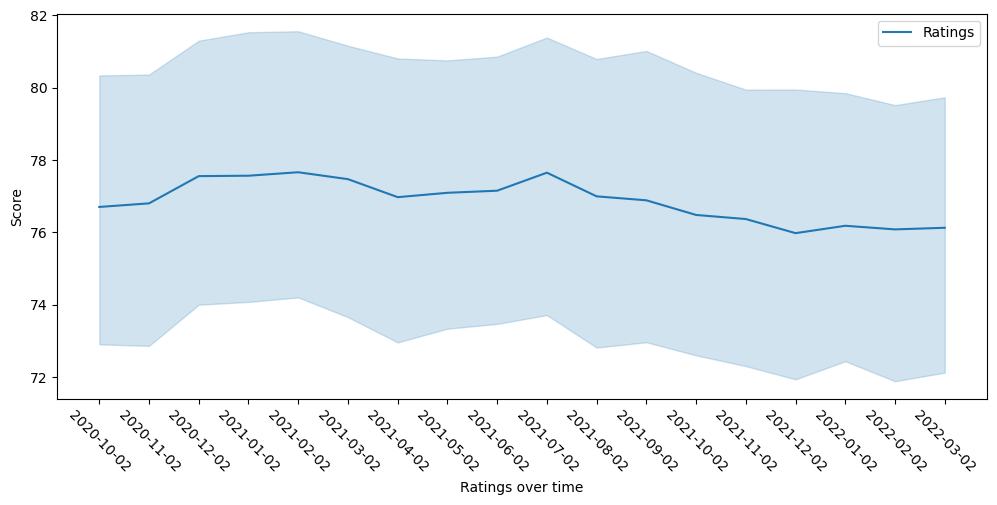

In [19]:
#score changes over time
plt.figure(figsize = (12,5))
  
#plotting a simple time series plot using seaborn
sns.lineplot(x = "Date",
             y = "Score",
             data = newsguard,
             label = "Ratings")
  
plt.xlabel("Ratings over time")
plt.xticks(rotation=-45)
plt.show()